In [1]:

import os
import numpy as np
import pandas as pd
import librosa
import sys
import matplotlib.pyplot as plt
import librosa.display
import plotly.express as px
from sklearn.decomposition import PCA
from fnmatch import fnmatch
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

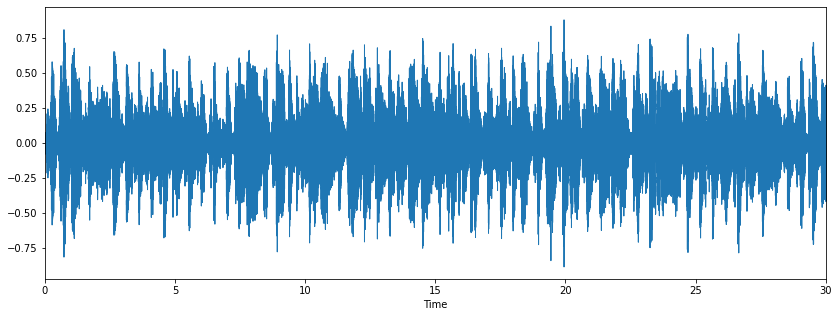

In [2]:
sample_audio='/content/drive/MyDrive/gtzan/Data/genres_original/blues/blues.00000.wav'
x,sr=librosa.load(sample_audio)

plt.figure(figsize=(14,5))

librosa.display.waveplot(x, sr=sr)



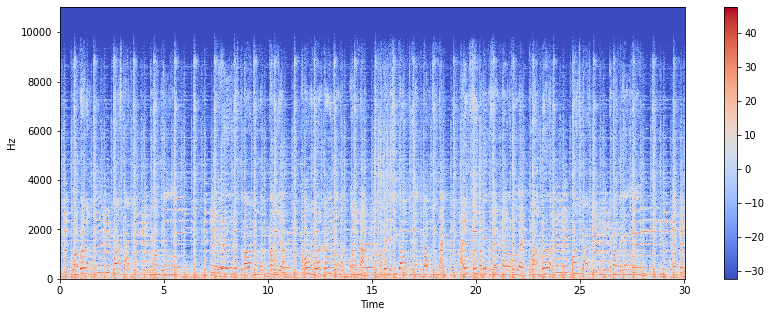

In [3]:

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()


In [4]:
import plotly.express as px
from sklearn.decomposition import PCA

df = pd.read_csv(r'/content/drive/MyDrive/featuresss.csv')
X=df.iloc[:,2:98]
pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['genre_name'])
fig.show()


In [5]:
#specifying the dataset path for further processing

WAV_DIR = '/content/drive/MyDrive/gtzan/Data/genres_original'
wav_files = os.listdir(WAV_DIR)
print(wav_files, len(wav_files))

['jazz', 'disco', 'reggae', 'country', 'rock', 'hiphop', 'blues', 'classical', 'metal', 'pop'] 10


In [6]:
#defining the column names related to features ,
#which process through pandas dataframe, for feature extraction purpose


col_names = ['file_name', 'genre name','zcr_mean', 'zcr_std',
             'spectral_centroid_mean', 'spectral_centroid_std'] +\
                     ['spectral_rolloff_mean', 'spectral_rolloff_std'] + \
            ['mfccs_' + str(i+1) + '_mean' for i in range(20)] + \
            ['mfccs_' + str(i+1) + '_std' for i in range(20)] 
dfppt= pd.DataFrame(columns=col_names)
print(dfppt)

Empty DataFrame
Columns: [file_name, genre name, zcr_mean, zcr_std, spectral_centroid_mean, spectral_centroid_std, spectral_rolloff_mean, spectral_rolloff_std, mfccs_1_mean, mfccs_2_mean, mfccs_3_mean, mfccs_4_mean, mfccs_5_mean, mfccs_6_mean, mfccs_7_mean, mfccs_8_mean, mfccs_9_mean, mfccs_10_mean, mfccs_11_mean, mfccs_12_mean, mfccs_13_mean, mfccs_14_mean, mfccs_15_mean, mfccs_16_mean, mfccs_17_mean, mfccs_18_mean, mfccs_19_mean, mfccs_20_mean, mfccs_1_std, mfccs_2_std, mfccs_3_std, mfccs_4_std, mfccs_5_std, mfccs_6_std, mfccs_7_std, mfccs_8_std, mfccs_9_std, mfccs_10_std, mfccs_11_std, mfccs_12_std, mfccs_13_std, mfccs_14_std, mfccs_15_std, mfccs_16_std, mfccs_17_std, mfccs_18_std, mfccs_19_std, mfccs_20_std]
Index: []

[0 rows x 48 columns]


In [7]:
#creating a function to perform feature extraction on the given audio file

def AudioFeatureExtraction(tmp,feature_list):

  zcr = librosa.feature.zero_crossing_rate(y)[0]
  feature_list.append(np.mean(zcr))
  feature_list.append(np.std(zcr))
  spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
  feature_list.append(np.mean(spectral_centroids))
  feature_list.append(np.std(spectral_centroids))
  spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]
  feature_list.append(np.mean(spectral_rolloff))
  feature_list.append(np.std(spectral_rolloff))

  mfccs = librosa.feature.mfcc(y, sr=sr)
  feature_list.extend(np.mean(mfccs, axis=1))
  feature_list.extend(np.std(mfccs, axis=1))
  return feature_list

In [ ]:
#performing feature extraction on all audio files and exporting into a csv file
from fnmatch import fnmatch
root = '/content/drive/MyDrive/gtzan/Data/genres_original/'
pattern = "*.wav"
cnt=0
#to iterate through every file in subfolder
for path, subdirs, files in os.walk(root):
    for name in files:  
        if fnmatch(name, pattern):
            xx=os.path.join(path, name)
            try:
              cnt+=1
              print(cnt)
              print(name)
              y, sr = librosa.load(xx, sr = 22050)
              feature_list = [name]
              temp=name.split('.')
              feature_list.append(temp[0])
              feature_list=AudioFeatureExtraction(xx,feature_list)
              feature_list[2:] = np.round(feature_list[2:], decimals=3)
            except:
                pass
            dfppt = dfppt.append(pd.DataFrame(feature_list, index=col_names).transpose(), ignore_index=True)
print(dfppt)
# Save file
dfppt.to_csv('featuresss.csv', index=False)

1
jazz.00002.wav
2
jazz.00000.wav
3
jazz.00005.wav
4
jazz.00004.wav
5
jazz.00003.wav
6
jazz.00001.wav
7
jazz.00014.wav
8
jazz.00013.wav
9
jazz.00010.wav
10
jazz.00007.wav
11
jazz.00017.wav
12
jazz.00018.wav
13
jazz.00012.wav
14
jazz.00015.wav
15
jazz.00009.wav
16
jazz.00008.wav
17
jazz.00006.wav
18
jazz.00011.wav
19
jazz.00016.wav
20
jazz.00026.wav
21
jazz.00030.wav
22
jazz.00020.wav
23
jazz.00023.wav
24
jazz.00028.wav
25
jazz.00027.wav
26
jazz.00031.wav
27
jazz.00025.wav
28
jazz.00021.wav
29
jazz.00019.wav
30
jazz.00029.wav
31
jazz.00022.wav
32
jazz.00024.wav
33
jazz.00036.wav
34
jazz.00042.wav
35
jazz.00043.wav
36
jazz.00035.wav
37
jazz.00041.wav
38
jazz.00034.wav
39
jazz.00033.wav
40
jazz.00037.wav
41
jazz.00040.wav
42
jazz.00038.wav
43
jazz.00039.wav
44
jazz.00032.wav
45
jazz.00048.wav
46
jazz.00044.wav
47
jazz.00046.wav
48
jazz.00049.wav
49
jazz.00047.wav
50
jazz.00057.wav
51
jazz.00045.wav
52
jazz.00050.wav
53
jazz.00052.wav
54
jazz.00051.wav
55
jazz.00055.wav
56
jazz.00056.wav
5

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


59
jazz.00060.wav
60
jazz.00070.wav
61
jazz.00059.wav
62
jazz.00067.wav
63
jazz.00061.wav
64
jazz.00058.wav
65
jazz.00064.wav
66
jazz.00068.wav
67
jazz.00066.wav
68
jazz.00069.wav
69
jazz.00063.wav
70
jazz.00062.wav
71
jazz.00065.wav
72
jazz.00074.wav
73
jazz.00079.wav
74
jazz.00072.wav
75
jazz.00075.wav
76
jazz.00071.wav
77
jazz.00080.wav
78
jazz.00077.wav
79
jazz.00083.wav
80
jazz.00082.wav
81
jazz.00078.wav
82
jazz.00076.wav
83
jazz.00073.wav
84
jazz.00081.wav
85
jazz.00092.wav
86
jazz.00087.wav
87
jazz.00095.wav
88
jazz.00096.wav
89
jazz.00091.wav
90
jazz.00088.wav
91
jazz.00094.wav
92
jazz.00085.wav
93
jazz.00089.wav
94
jazz.00093.wav
95
jazz.00086.wav
96
jazz.00084.wav
97
jazz.00090.wav
98
jazz.00098.wav
99
jazz.00097.wav
100
jazz.00099.wav
101
disco.00002.wav
102
disco.00004.wav
103
disco.00000.wav
104
disco.00003.wav
105
disco.00001.wav
106
disco.00017.wav
107
disco.00009.wav
108
disco.00015.wav
109
disco.00018.wav
110
disco.00010.wav
111
disco.00019.wav
112
disco.00016.wav
113

In [8]:

dfppt = pd.read_csv(r'/content/drive/MyDrive/featuresss.csv')
print (dfppt)

          file_name genre_name  zcr_mean  zcr_std  spectral_centroid_mean  \
0    jazz.00002.wav       jazz     0.058    0.030                1064.669   
1    jazz.00000.wav       jazz     0.078    0.049                1503.869   
2    jazz.00005.wav       jazz     0.058    0.030                1268.325   
3    jazz.00004.wav       jazz     0.048    0.023                1039.263   
4    jazz.00003.wav       jazz     0.045    0.014                 813.063   
..              ...        ...       ...      ...                     ...   
995   pop.00097.wav        pop     0.137    0.142                3508.787   
996   pop.00091.wav        pop     0.167    0.099                3694.895   
997   pop.00095.wav        pop     0.106    0.066                3047.545   
998   pop.00096.wav        pop     0.105    0.064                3126.642   
999   pop.00090.wav        pop     0.148    0.088                3603.718   

     spectral_centroid_std  spectral_rolloff_mean  spectral_rolloff_std  \


In [9]:

%matplotlib notebook

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X = dfppt.iloc[:,2:]
y = dfppt['genre_name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12,random_state=3)
print(X_train.shape)
print(y_train.shape)

(880, 46)
(880,)


In [10]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
x_train=X_train_scaled 
x_test=X_test_scaled
print(X_train)
print(X_test)

     zcr_mean  zcr_std  spectral_centroid_mean  spectral_centroid_std  \
400     0.047    0.032                1282.166                547.472   
227     0.072    0.036                2058.822                493.410   
661     0.076    0.041                1811.771                589.397   
546     0.119    0.067                2702.622                838.109   
239     0.066    0.051                1700.906                723.334   
..        ...      ...                     ...                    ...   
952     0.136    0.091                3497.602               1173.185   
643     0.098    0.043                2301.610                452.988   
249     0.102    0.082                2542.615               1291.650   
664     0.103    0.044                2030.657                469.923   
874     0.054    0.026                1740.723                426.407   

     spectral_rolloff_mean  spectral_rolloff_std  mfccs_1_mean  mfccs_2_mean  \
400               2675.788              127

In [11]:
from sklearn import svm
clfr = svm.SVC(kernel='rbf',C=11,probability=True)

clfr.fit(x_train,y_train)

print("accuracy is ",clfr.score(x_test,y_test))


accuracy is  0.7833333333333333


In [12]:
from sklearn.metrics import confusion_matrix
ypred=clfr.predict(x_test)
cm = confusion_matrix(y_test,ypred)
#print(cm)

import seaborn as sns


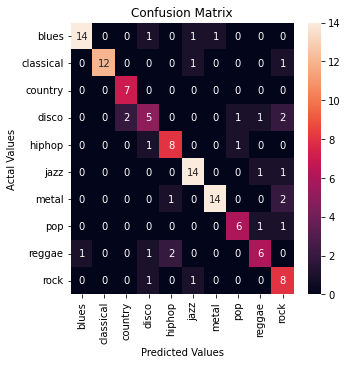

In [13]:
%matplotlib inline
cm_df = pd.DataFrame(cm,
                     index = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'], 
                     columns = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'])
plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))



              precision    recall  f1-score   support

       blues       0.93      0.82      0.87        17
   classical       1.00      0.86      0.92        14
     country       0.78      1.00      0.88         7
       disco       0.56      0.45      0.50        11
      hiphop       0.73      0.80      0.76        10
        jazz       0.82      0.88      0.85        16
       metal       0.93      0.82      0.87        17
         pop       0.75      0.75      0.75         8
      reggae       0.67      0.60      0.63        10
        rock       0.53      0.80      0.64        10

    accuracy                           0.78       120
   macro avg       0.77      0.78      0.77       120
weighted avg       0.80      0.78      0.79       120



In [15]:
import warnings
warnings.filterwarnings('ignore')

trying on other files

In [16]:
#single genre
ext="/content/drive/MyDrive/mgc check wav files external/gharmore.wav"
y, sr = librosa.load(ext, sr = 22050)
temp_features=AudioFeatureExtraction(y,[])
temp_features = np.round(temp_features, decimals=3)
temp_flist=np.array(temp_features)
tempp=scaler.transform([temp_flist])
pred=clfr.predict(tempp)
print(pred)

['pop']


In [18]:
#multi genre
ext="/content/drive/MyDrive/mgc check wav files external/Country disco/[ONTIVA.COM] (Cutter) Kacey Musgraves - High Horse (Official Music Video)-HQ.wav"
y, sr = librosa.load(ext, sr = 22050)
temp_features=AudioFeatureExtraction(y,[])
temp_features = np.round(temp_features, decimals=3)
temp_flist=np.array(temp_features)
tempp=scaler.transform([temp_flist])
pred=clfr.predict(tempp)
ix=clfr.predict_proba(tempp)
jagadlist=['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
ixx=ix.tolist()
ixxx=ixx[0]
dictt={}
for i in range(0,len(jagadlist)):
  dictt[jagadlist[i]]=ixxx[i]
dicttsort={k: v for k, v in sorted(dictt.items(), key=lambda item: item[1])}
print(list(dicttsort.keys())[-1])
print(list(dicttsort.keys())[-2])


classical
rock
